  Install Libraries

In [1]:
!pip install sk-video

  Using cached sk_video-1.1.10-py2.py3-none-any.whl (2.3 MB)


Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
import random
from numba import prange
import plotly.express as px
from sklearn.cluster import KMeans
import warnings 
from scipy import stats
import skvideo.io
import cv2
warnings.filterwarnings("ignore")

Import Video

In [3]:
video = cv2.imread('dst/traditional/Trad_2022-0505-161325/0.jpg')
print(video.shape)

(480, 640, 3)


In [4]:
background = video.copy()
background.shape

(480, 640, 3)

Get Random Frames

In [8]:
n_frames = 20
frames_idx = []
for i in range(0, n_frames):
  frames_idx.append(random.randint(0, 1000))

Display randomly selected frames

TypeError: Image data of dtype object cannot be converted to float

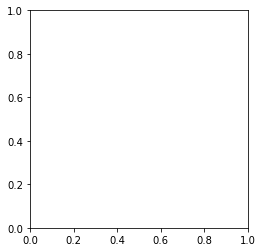

In [9]:
for frame in frames_idx:
  plt.imshow(cv2.imread(f'dst/Traditonal/Trad_2022-0505-161325/{frame}.jpg'))
  plt.show()

In [ ]:

for x in prange(0, video.shape[1]):
  for y in prange(0, video.shape[0]):
    colors=[]
    for z in frames_idx:
      colors.append(cv2.imread(f'dst/fisheye/FE_2022-0505-110000/{frame}.jpg')[y][x])

    ca = KMeans(n_clusters = 2)
    ca = ca.fit(colors)
    labels, counts = np.unique(ca.labels_, return_counts=True)
    clusters = dict(zip(labels, counts))
    most_common = max(clusters, key=clusters.get)
    colors_plot = colors
    if most_common == 1:
      colors = [colors[i] for i in np.where(np.array(ca.labels_))[0]]
    else:
      colors = [colors[i] for i in np.where(np.logical_not(np.array(ca.labels_)))[0]]
    colors_a = np.array(colors)
    background_pixel = []
    background_pixel.append(np.median(colors_a[:,0]))
    background_pixel.append(np.median(colors_a[:,1]))
    background_pixel.append(np.median(colors_a[:,2]))
    background[y][x] = background_pixel
print(done)

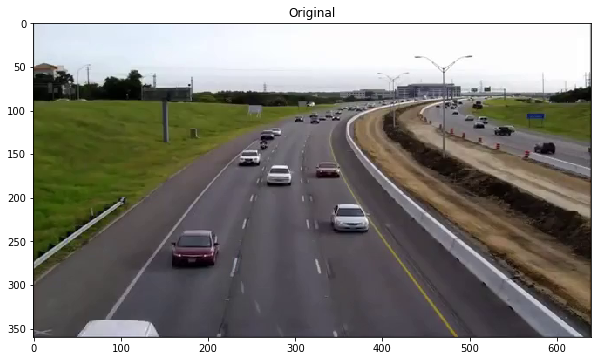

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(video[0])
plt.title("Original")
plt.show()

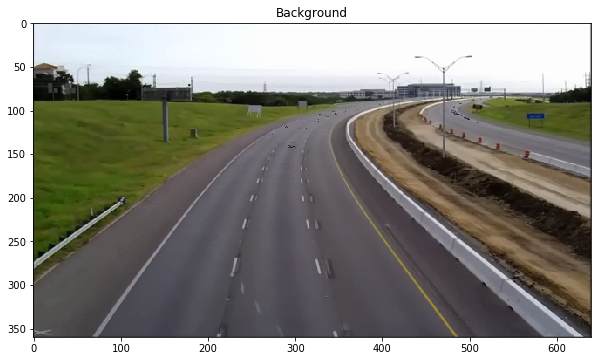

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(background)
plt.title("Background")
plt.show()

In [ ]:

background = background.astype("int16")
cv2.imwrite(f'background.jpg',background)

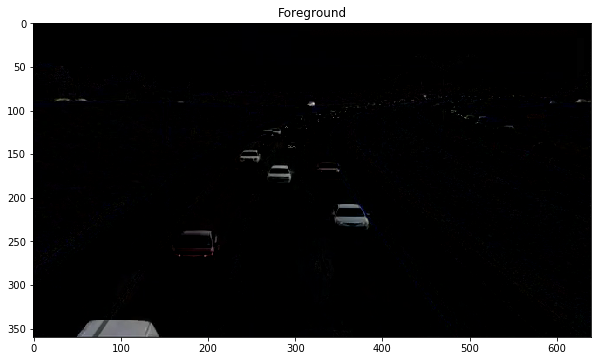

In [11]:
foreground = (video[0] - background)
np.clip(foreground, 0, 255, out=foreground)
plt.figure(figsize=(10,10))
plt.imshow(foreground)
plt.title("Foreground")
plt.show()

In [12]:
%%time
foreground = video.copy()
for i in range(0,foreground.shape[0]):
  foreground[i] = np.subtract(video[i], background)
  np.clip(foreground[i], 0, 255, out=foreground[i])
  foreground[i] = foreground[i].astype(np.uint8)

foreground = foreground.astype(np.uint8)
skvideo.io.vwrite("foreground.mp4", foreground)

CPU times: user 4.9 s, sys: 1.26 s, total: 6.16 s
Wall time: 14 s


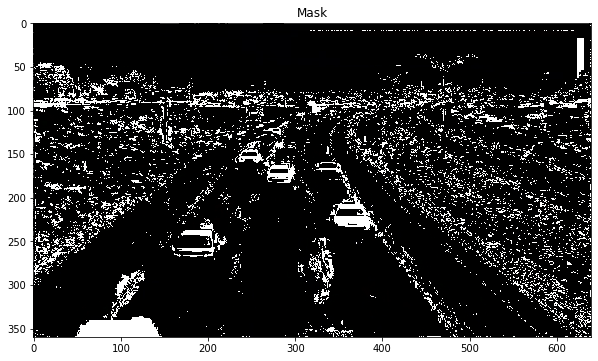

CPU times: user 2.47 s, sys: 6 ms, total: 2.48 s
Wall time: 2.48 s


In [13]:
%%time
mask = foreground[0].copy()
for x in prange(0, mask.shape[1]):
  for y in prange(0, mask.shape[0]):
    if np.mean(mask[y][x]) > 1:
      mask[y][x] = [255,255,255]
plt.figure(figsize=(10,10))
plt.imshow(mask)
plt.title("Mask")
plt.show()

In [16]:
%%time
mask = foreground.copy()
for i in range(0, mask.shape[2]):
  for x in prange(0, mask.shape[2]):
    for y in prange(0, mask.shape[1]):
      if np.mean(mask[i][y][x]) > 1:
        mask[i][y][x] = [255,255,255]
      else:
        mask[i][y][x] = [0,0,0]
mask = mask.astype(np.uint8)
skvideo.io.vwrite("mask.mp4", mask)

CPU times: user 31min 29s, sys: 771 ms, total: 31min 29s
Wall time: 31min 40s


In [15]:
pixel = pd.DataFrame(colors_plot, columns=["R","G","B"])
pixel["label"] = ca.labels_
fig = px.scatter_3d(pixel, x = "R", y = "G", z = "B", color="label")
fig.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


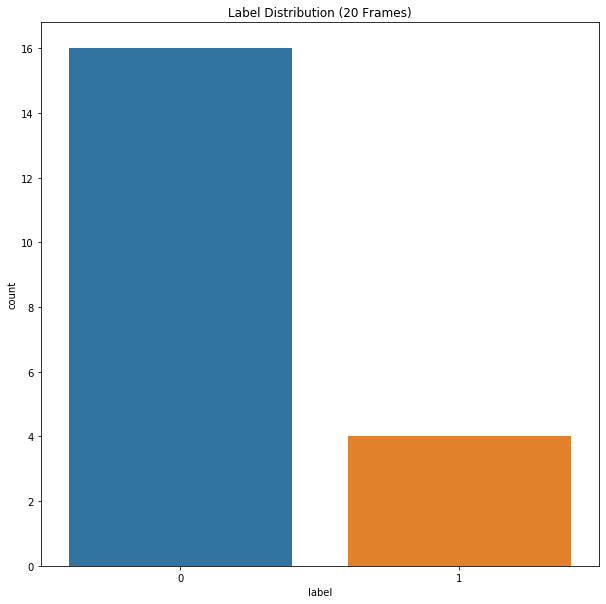

In [25]:
plt.figure(figsize=(10,10))
sns.countplot(data=pixel, x="label")
plt.title("Label Distribution (20 Frames)")
plt.show()